### Problem Description

Consider the **Biscobis** file referring to a sample of 100 client companies of a large company that is a supplier in the industrial sector. 

#### Variables:
- **Dependent Variable**:  
  - `x14` = Purchase profile  
    - 1 = New purchase  
    - 2 = First repurchase  
    - 3 = Others  

- **Independent Variables**: Evaluation from 0 to 10 of Biscobis attributes:  
  - `X1` = Speed in product delivery  
  - `X2` = Price level  
  - `X3` = Price flexibility  
  - `X4` = Supplier image  
  - `X5` = Service as a whole  
  - `X6` = Sales force image  
  - `X7` = Product quality  

#### Task:
Process the discriminant analysis.  
Make a complete analysis of the main information obtained and evaluate the accuracy of the a posteriori classification of the database elements.

In [1]:
# Importing necessary libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import f_oneway
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Configuring dark mode for plots
plt.style.use('dark_background')


In [2]:
# local do arquivo
Caminho='/Users/fabicampanari/Desktop/3sst Exam /Biscobis.xlsx'

In [3]:
# Loading the dataset
try:
    df = pd.read_excel(Caminho)
    print("Dataset loaded successfully!")
    display(df.head())
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset loaded successfully!


,ident,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
0,1,4.1,0.6,6.9,4.7,2.4,2.3,5.2,0,32,4.2,1,0,1,1
1,5,6.0,0.9,9.6,7.8,3.4,4.6,4.5,0,58,6.8,1,0,1,3
2,7,4.6,2.4,9.5,6.6,3.5,4.5,7.6,0,46,5.8,1,0,1,1
3,9,5.5,1.6,9.4,4.7,3.5,3.0,7.6,0,63,5.4,1,0,1,3
4,11,2.4,1.6,8.8,4.8,2.0,2.8,5.8,0,32,4.3,1,0,0,1


In [4]:
# Separating predictor variables (features) and the target variable (response)
# Independent variables: X1 to X7
# Dependent variable: x14 (purchase profile)
X = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']]
y = df['x14']

In [5]:
# Performing ANOVA to test equality of means
# This step evaluates the discrimination power of each independent variable
anova_results = {}
for column in X.columns:
    groups = [X.loc[y == group, column] for group in np.unique(y)]
    f_stat, p_value = f_oneway(*groups)
    anova_results[column] = {'F-statistic': f_stat, 'p-value': p_value}


In [6]:
print("ANOVA Results:")
for variable, result in anova_results.items():
    print(f"Variable: {variable}")
    print(f"  F-statistic: {result['F-statistic']:.4f}")
    print(f"  p-value: {result['p-value']:.4f}")
    if result['p-value'] < 0.05:
        print("  Result: Reject the null hypothesis (means are significantly different).")
    else:
        print("  Result: Fail to reject the null hypothesis (no significant difference in means).")
    print()

ANOVA Results:
Variable: x1
  F-statistic: 41.0934
  p-value: 0.0000
  Result: Reject the null hypothesis (means are significantly different).

Variable: x2
  F-statistic: 14.3562
  p-value: 0.0000
  Result: Reject the null hypothesis (means are significantly different).

Variable: x3
  F-statistic: 43.7758
  p-value: 0.0000
  Result: Reject the null hypothesis (means are significantly different).

Variable: x4
  F-statistic: 2.7275
  p-value: 0.0704
  Result: Fail to reject the null hypothesis (no significant difference in means).

Variable: x5
  F-statistic: 36.8927
  p-value: 0.0000
  Result: Reject the null hypothesis (means are significantly different).

Variable: x6
  F-statistic: 0.1317
  p-value: 0.8768
  Result: Fail to reject the null hypothesis (no significant difference in means).

Variable: x7
  F-statistic: 10.7599
  p-value: 0.0001
  Result: Reject the null hypothesis (means are significantly different).



In [7]:
# Creating and fitting the Linear Discriminant Analysis (LDA) model
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

LinearDiscriminantAnalysis()

In [8]:
# Making predictions
y_pred = lda.predict(X)


In [9]:
# Evaluating which variable discriminates the most
# The coefficients of the LDA model indicate the importance of each variable
coefficients = lda.coef_
print("LDA Model Coefficients:")
for idx, variable in enumerate(X.columns):
    print(f"{variable}: {coefficients[0][idx]:.4f}")

LDA Model Coefficients:
x1: -0.4309
x2: -0.4988
x3: -1.3650
x4: -1.0182
x5: -2.3056
x6: 1.5126
x7: 0.3730


In [10]:
# Evaluating the model's performance
# Confusion matrix and classification report
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y, y_pred, target_names=['New Purchase', 'First Repurchase', 'Others'])
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[29  3  2]
 [ 1 24  7]
 [ 0  2 32]]
Classification Report:
                  precision    recall  f1-score   support

    New Purchase       0.97      0.85      0.91        34
First Repurchase       0.83      0.75      0.79        32
          Others       0.78      0.94      0.85        34

        accuracy                           0.85       100
       macro avg       0.86      0.85      0.85       100
    weighted avg       0.86      0.85      0.85       100



Text(0.5, 0, 'Predicted Class')

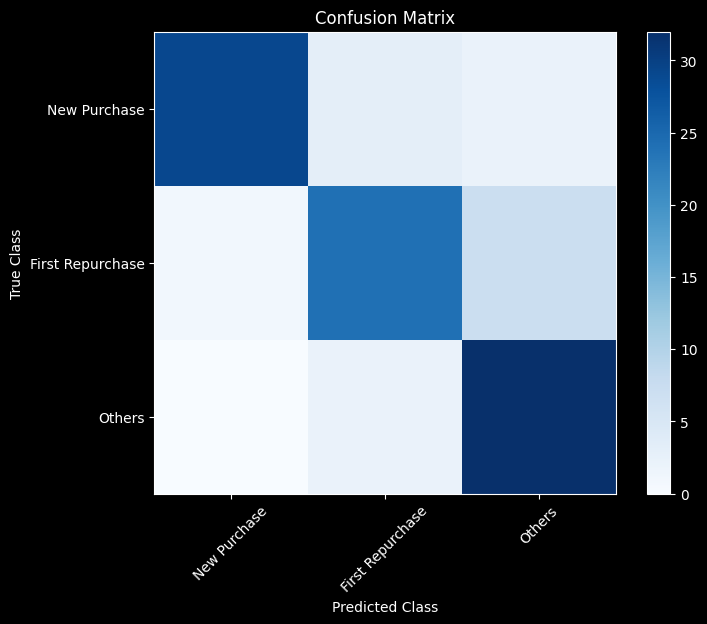

In [11]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, ['New Purchase', 'First Repurchase', 'Others'], rotation=45)
plt.yticks(tick_marks, ['New Purchase', 'First Repurchase', 'Others'])
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

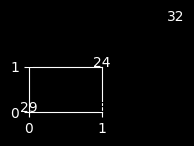

In [12]:
# Adding values to the squares
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# 🇺🇸 Discriminant Analysis

## Overview
The code uses **Linear Discriminant Analysis (LDA)** to process the discriminant analysis. The steps include:

### 1. Separating Variables
- Independent variables (`X1` to `X7`) and the dependent variable (`x14`) are separated.

### 2. Fitting the LDA Model
- The `LinearDiscriminantAnalysis` class from `sklearn` is used to fit the model to the data.

### 3. Making Predictions
- The model predicts the purchase profile (`x14`) for each observation.

---

## 1. Analysis of Discrimination Power
The code performs **ANOVA (Analysis of Variance)** to evaluate the discrimination power of each independent variable. This determines whether the means of the variables differ significantly across the groups of the dependent variable (`x14`).

- **Null Hypothesis (H₀):** The means of the groups are equal.
- **Alternative Hypothesis (H₁):** The means of the groups are not equal.

If the **p-value** is less than `0.05`, the null hypothesis is rejected, indicating that the variable has significant discrimination power.

---

## Final Output

### ANOVA Results:
- Identifies which variables have significant discrimination power.
- Variables with p-values < 0.05 are significant.

### LDA Coefficients:
- Indicates the importance of each variable in separating the groups.

### Confusion Matrix and Classification Report:
- Evaluates the accuracy of the model and provides detailed metrics for each group.

### Confusion Matrix Visualization:
- A heatmap of the confusion matrix for easy interpretation.

---

## Recommendations

### Focus on Significant Variables:
- Use variables with significant p-values and high LDA coefficients for decision-making.

### Improve Model:
- If the model struggles with certain groups, consider adding more features or using advanced classification techniques like Quadratic Discriminant Analysis (QDA).

### Further Analysis:
- Perform post-hoc tests (e.g., Tukey's HSD) to identify specific group differences.
- Investigate potential correlations between independent variables to ensure they provide unique information.


# 🇧🇷 Análise Discriminante

## Visão Geral
O código usa **Análise Discriminante Linear (LDA)** para processar a análise discriminante. As etapas incluem:

### 1. Separando Variáveis
- Variáveis independentes (`X1` a `X7`) e a variável dependente (`x14`) são separadas.

### 2. Ajustando o Modelo LDA
- A classe `LinearDiscriminantAnalysis` de `sklearn` é usada para encaixar o modelo nos dados.

### 3. Fazendo Previsões
- O modelo prevê o perfil de compra (`x14`) para cada observação.

---

## 1. Análise do Poder de Discriminação
O código executa **ANOVA (Análise de Variância)** para avaliar o poder de discriminação de cada variável independente. Isso determina se as médias das variáveis diferem significativamente entre os grupos da variável dependente (`x14`).

- **Hipótese Nula (H₀):** As médias dos grupos são iguais.
- **Hipótese Alternativa (H₁):** As médias dos grupos não são iguais.

Se o **valor p** for menor que `0,05`, a hipótese nula é rejeitada, indicando que a variável tem poder de discriminação significativo.

---

## Saída Final

### Resultados ANOVA:
- Identifica quais variáveis têm poder de discriminação significativo.
- Variáveis com valores p < 0,05 são significativas.

### Coeficientes LDA:
- Indica a importância de cada variável na separação dos grupos.

### Matriz de Confusão e Relatório de Classificação:
- Avalia a precisão do modelo e fornece métricas detalhadas para cada grupo.

### Visualização da Matriz de Confusão:
- Um mapa de calor da matriz de confusão para fácil interpretação.

---

## Recomendações

### Foco em Variáveis Significativas:
- Use variáveis com valores p significativos e altos coeficientes de LDA para tomada de decisão.

### Melhorar o Modelo:
- Se o modelo tiver dificuldades com certos grupos, considere adicionar mais recursos ou usar técnicas avançadas de classificação, como a Análise Discriminante Quadrática (QDA).

### Análise Adicional:
- Realize testes post-hoc (por exemplo, HSD de Tukey) para identificar diferenças específicas de grupo.
- Investigue possíveis correlações entre variáveis independentes para garantir que elas forneçam informações exclusivas.